# Import Statements

In [ ]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import OneHotEncoder
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import shap
from math import sqrt
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import seaborn as sns

# Dataset 

## Pre-processing genotype file

In [3]:
#Load file
genotype = pd.read_csv('extracted_chr_vcf.012', sep='\t', header=None)
genotype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 92942 entries, 0 to 92941
dtypes: int64(92942)
memory usage: 229.7 MB


In [7]:
genotype.head()

,0,1,2,3,4,5,6,7,8,9,...,92932,92933,92934,92935,92936,92937,92938,92939,92940,92941
0,0,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,0,2,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2
3,2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,2,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,0


In [9]:
#Adding column name
column_names = pd.read_csv('snp_ids.txt', sep=' ', header=None)

In [10]:
df = pd.DataFrame(column_names)
column_names.head

<bound method NDFrame.head of                     0
0          Chr1_58474
1          Chr1_58637
2          Chr1_58679
3          Chr1_75714
4          Chr1_76580
...               ...
92937  Chr7_529053626
92938  Chr7_529061553
92939  Chr7_529062345
92940  Chr7_529063139
92941  Chr7_529064117

[92942 rows x 1 columns]>

In [11]:
genotype.columns = column_names
genotype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 92942 entries, ('Chr1_58474',) to ('Chr7_529064117',)
dtypes: int64(92942)
memory usage: 229.7 MB


In [12]:
genotype.head()

,"(Chr1_58474,)","(Chr1_58637,)","(Chr1_58679,)","(Chr1_75714,)","(Chr1_76580,)","(Chr1_77773,)","(Chr1_77886,)","(Chr1_77954,)","(Chr1_78069,)","(Chr1_79507,)",...,"(Chr7_529036411,)","(Chr7_529038517,)","(Chr7_529046114,)","(Chr7_529051156,)","(Chr7_529051189,)","(Chr7_529053626,)","(Chr7_529061553,)","(Chr7_529062345,)","(Chr7_529063139,)","(Chr7_529064117,)"
0,0,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,2,0,0,0
1,0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,0,2,0,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2
3,2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,2,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,0


In [13]:
#Adding row names
rows= pd.read_csv('extracted_chr.012.indv', header=None)
rows.head()

,0
0,3156-11_AGL
1,CDC_Asterix_AGL
2,CDC_Cherie_AGL
3,CDC_Glamis_AGL
4,CDC_Gold_AGL


In [14]:
rows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       324 non-null    object
dtypes: object(1)
memory usage: 2.7+ KB


In [15]:
genotype.index = rows
genotype.head()

,"(Chr1_58474,)","(Chr1_58637,)","(Chr1_58679,)","(Chr1_75714,)","(Chr1_76580,)","(Chr1_77773,)","(Chr1_77886,)","(Chr1_77954,)","(Chr1_78069,)","(Chr1_79507,)",...,"(Chr7_529036411,)","(Chr7_529038517,)","(Chr7_529046114,)","(Chr7_529051156,)","(Chr7_529051189,)","(Chr7_529053626,)","(Chr7_529061553,)","(Chr7_529062345,)","(Chr7_529063139,)","(Chr7_529064117,)"
"(3156-11_AGL,)",0,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,2,0,0,0
"(CDC_Asterix_AGL,)",0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,0,2,0,0,0
"(CDC_Cherie_AGL,)",0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2
"(CDC_Glamis_AGL,)",2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,2,0,0
"(CDC_Gold_AGL,)",0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,0


In [16]:
genotype.to_csv('genotype_50.txt', sep ='\t', index = True)

In [18]:
!sed 's/[,()\x27]//g'  genotype_50.txt > genotype_new.txt

In [20]:
#Load the genotype data
genotype_new = pd.read_csv('genotype_new.txt', sep = '\t')
genotype_new.head()

,Unnamed: 0,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,...,Chr7_529036411,Chr7_529038517,Chr7_529046114,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117
0,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,2,0,1,0,0,0,2,0,0,0
1,CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,...,2,0,0,0,0,0,2,0,0,0
2,CDC_Cherie_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
3,CDC_Glamis_AGL,2,2,0,0,0,0,0,0,1,...,0,0,0,0,0,0,2,2,0,0
4,CDC_Gold_AGL,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,2,0,0,0,0


In [21]:
genotype_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Columns: 92943 entries, Unnamed: 0 to Chr7_529064117
dtypes: int64(92942), object(1)
memory usage: 229.7+ MB


In [22]:
#Setting the index and naming the index column 
genotype_new = genotype_new.rename(columns={genotype_new.columns[0]: 'Germplasm_Name'})
genotype_new.set_index(genotype_new.columns[0])

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,Chr7_529036411,Chr7_529038517,Chr7_529046114,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117
Germplasm_Name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,2,0,1,0,0,0,2,0,0,0
CDC_Asterix_AGL,0,0,0,0,0,0,0,0,1,1,...,2,0,0,0,0,0,2,0,0,0
CDC_Cherie_AGL,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,2,2
CDC_Glamis_AGL,2,2,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,2,2,0,0
CDC_Gold_AGL,0,0,0,0,1,0,0,0,0,0,...,0,1,1,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
W6_27754_LSP_AGL,0,0,1,0,0,0,1,0,1,1,...,0,0,0,0,0,0,1,1,1,2
W6_27760_LSP_AGL,0,0,0,0,1,0,1,2,0,0,...,0,0,0,0,0,0,0,0,2,2
W6_27763_LSP_AGL,2,2,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,2,2,0,0


## Preprocessing phenotype data

In [23]:
#Load phenotype data and set index
phenotype = pd.read_csv('DTF_covariate_phe.txt', sep='\t')
phenotype.head()

,Germplasm_Name,Rep_Location,Year,DTF
0,ILL_8009_AGL,1_Sutherland_Canada,2018,43.0
1,ILL_8009_AGL,2_Sutherland_Canada,2018,42.0
2,ILL_8009_AGL,3_Sutherland_Canada,2018,40.0
3,ILL_8009_AGL,1_Metaponto_Italy,2016,121.0
4,ILL_8009_AGL,2_Metaponto_Italy,2016,121.0


In [24]:
phenotype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17493 entries, 0 to 17492
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Germplasm_Name  17493 non-null  object 
 1   Rep_Location    17493 non-null  object 
 2   Year            17493 non-null  int64  
 3   DTF             15591 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 546.8+ KB


In [25]:
phenotype.set_index('Germplasm_Name', inplace=True)
phenotype.head()

,Rep_Location,Year,DTF
Germplasm_Name,,,
ILL_8009_AGL,1_Sutherland_Canada,2018,43.0
ILL_8009_AGL,2_Sutherland_Canada,2018,42.0
ILL_8009_AGL,3_Sutherland_Canada,2018,40.0
ILL_8009_AGL,1_Metaponto_Italy,2016,121.0
ILL_8009_AGL,2_Metaponto_Italy,2016,121.0


In [26]:
phenotype_cleaned = phenotype.dropna() #removing blank phenotype values
phenotype_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15591 entries, ILL_8009_AGL to PI_431710_LSP_AGL
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rep_Location  15591 non-null  object 
 1   Year          15591 non-null  int64  
 2   DTF           15591 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 487.2+ KB


In [27]:
phenotype_cleaned.head()

,Rep_Location,Year,DTF
Germplasm_Name,,,
ILL_8009_AGL,1_Sutherland_Canada,2018,43.0
ILL_8009_AGL,2_Sutherland_Canada,2018,42.0
ILL_8009_AGL,3_Sutherland_Canada,2018,40.0
ILL_8009_AGL,1_Metaponto_Italy,2016,121.0
ILL_8009_AGL,2_Metaponto_Italy,2016,121.0


## Final data

In [29]:
Final_data = pd.merge(genotype_new, phenotype_cleaned, on='Germplasm_Name', how='outer', indicator=False)

In [30]:
Final_data.head()

,Germplasm_Name,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,...,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117,Rep_Location,Year,DTF
0,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1_Sutherland_Canada,2018,57.0
1,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,2_Sutherland_Canada,2018,54.0
2,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,3_Sutherland_Canada,2018,53.0
3,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1_Metaponto_Italy,2016,135.0
4,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,2_Metaponto_Italy,2016,133.0


In [31]:
Final_data.set_index('Germplasm_Name', inplace=True)

In [32]:
#checking for any empty values to confirm if the merging was done right
nan_values = Final_data[Final_data.isna().any(axis=1)] 

In [33]:
nan_values.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117,Rep_Location,Year,DTF
Germplasm_Name,,,,,,,,,,,,,,,,,,,,,


In [ ]:
#if empty values are found then there was a change in the germplasm name. 
#the command takes input file and replaces spaces with underscores in the first field of each line
!awk -F'\t' '{gsub(/ /, "_", $1); print}' OFS='\t' phenotype.txt > phenotype_new.txt

In [34]:
#Final_data.to_pickle("first_model_chr_data.pkl") 

In [35]:
Final_data = pd.read_pickle("first_model_chr_data.pkl")
Final_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117,Rep_Location,Year,DTF
Germplasm_Name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,1_Sutherland_Canada,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2_Sutherland_Canada,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,3_Sutherland_Canada,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,1_Metaponto_Italy,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,2,0,0,0,2_Metaponto_Italy,2016,133.0


## One hot encoding

In [36]:
# Duplicate the 'Germplasm_name' index and create a new column 'Accession_name'
#doing this because while doing one-hot encoding I have to reset the index which removes the index, so I can easily make accession name as index then
Final_data['Accession_name'] = Final_data.index.copy()

# Reorganize the columns to make 'Accession_name' the first column
column_order = ['Accession_name'] + [col for col in Final_data.columns if col != 'Accession_name']
Final_data = Final_data[column_order]

# Display the result
Final_data.head()

,Accession_name,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,...,Chr7_529051156,Chr7_529051189,Chr7_529053626,Chr7_529061553,Chr7_529062345,Chr7_529063139,Chr7_529064117,Rep_Location,Year,DTF
Germplasm_Name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1_Sutherland_Canada,2018,57.0
3156-11_AGL,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,2_Sutherland_Canada,2018,54.0
3156-11_AGL,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,3_Sutherland_Canada,2018,53.0
3156-11_AGL,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,1_Metaponto_Italy,2016,135.0
3156-11_AGL,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,2_Metaponto_Italy,2016,133.0


In [37]:
# Extract the specified column
column_data = Final_data[['Rep_Location']]

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse=False)  # Drop first category to avoid multicollinearity

# Fit and transform the OneHotEncoder
one_hot_encoded = ohe.fit_transform(column_data)

In [38]:
# Get the column names after one-hot encoding
categories = ohe.get_feature_names(['Rep_Location'])
#the category name i as followed - Rep_Location_1_Cardoba_Spain. 
#So split based on underscores and pull the 2-5 parts to used as column names

feature_names = ['_'.join(col.split('_')[2:5]) for col in categories]

In [39]:
# Create a DataFrame with the one-hot encoded columns
one_hot_df = pd.DataFrame(one_hot_encoded, columns=feature_names)

In [40]:
#Check if ohe is done right
one_hot_df.head()

,1_Bardiya_Nepal,1_Bhopal_India,1_CentralFerry_USA,1_Cordoba_Spain,1_Jessore_Bangladesh,1_Marchouch_Morocco,1_Metaponto_Italy,1_Rosthern_Canada,1_Sutherland_Canada,2_Bardiya_Nepal,...,2_Sutherland_Canada,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
# Convert all columns to integer before merging back to main data
df = one_hot_df.astype(int)

print(df)

       1_Bardiya_Nepal  1_Bhopal_India  1_CentralFerry_USA  1_Cordoba_Spain  \
0                    0               0                   0                0   
1                    0               0                   0                0   
2                    0               0                   0                0   
3                    0               0                   0                0   
4                    0               0                   0                0   
...                ...             ...                 ...              ...   
15586                0               0                   0                0   
15587                0               0                   0                0   
15588                0               0                   0                0   
15589                0               0                   1                0   
15590                0               0                   0                0   

       1_Jessore_Bangladesh  1_Marchouch_Morocco  1

In [42]:
# Concatenate the one-hot encoded columns to the original DataFrame
ohe_data = pd.concat([Final_data.reset_index(drop=True), df], axis=1)
ohe_data.head()

,Accession_name,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,...,2_Sutherland_Canada,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada
0,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3156-11_AGL,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Drop the original 'Rep_Location' column
ohe_data = ohe_data.drop(['Rep_Location'], axis=1)

In [44]:
print(ohe_data)

         Accession_name  Chr1_58474  Chr1_58637  Chr1_58679  Chr1_75714  \
0           3156-11_AGL           0           0           0           0   
1           3156-11_AGL           0           0           0           0   
2           3156-11_AGL           0           0           0           0   
3           3156-11_AGL           0           0           0           0   
4           3156-11_AGL           0           0           0           0   
...                 ...         ...         ...         ...         ...   
15586  W6_27767_LSP_AGL           0           0           2           0   
15587  W6_27767_LSP_AGL           0           0           2           0   
15588  W6_27767_LSP_AGL           0           0           2           0   
15589  W6_27767_LSP_AGL           0           0           2           0   
15590  W6_27767_LSP_AGL           0           0           2           0   

       Chr1_76580  Chr1_77773  Chr1_77886  Chr1_77954  Chr1_78069  ...  \
0               1        

In [45]:
ohe_data.set_index('Accession_name', inplace=True)
ohe_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,2_Sutherland_Canada,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
# Reorganize the columns to make 'Year' the last but one column
column_order = [col for col in ohe_data.columns if col != 'Year'] + ['Year']
ohe_data = ohe_data[column_order]

In [47]:
# Reorganize the columns to make 'DTF' the last column
column_order = [col for col in ohe_data.columns if col != 'DTF'] + ['DTF']
ohe_data = ohe_data[column_order]


# Display the result
ohe_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year,DTF
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,133.0


In [48]:
#saves the onehot encoder for future use
#pickle.dump(ohe, open("DTF_ohe_firstmodel_chr.dat", "wb"))

In [ ]:
#if need or have new holdout data etc. you can load ohe the following way
#ohe = pickle.load(open("DTF_ohe.dat", "rb"))

In [49]:
#ohe_data.to_pickle("ohe_data_firstmodel_chr.pkl")

In [2]:
#Load ohe data
ohe_data = pd.read_pickle("ohe_data_firstmodel_chr.pkl")
ohe_data.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year,DTF
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,57.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2018,54.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2018,53.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,135.0
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2016,133.0


In [5]:
ohe_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15591 entries, 3156-11_AGL to W6_27767_LSP_AGL
Columns: 92971 entries, Chr1_58474 to DTF
dtypes: float64(1), int64(92970)
memory usage: 10.8+ GB


# Models 

## Prepare training and test set

In [6]:
#Split dataset into training,test and holdout

In [59]:
snps = ohe_data.iloc[:, 0:92970]
snps.head()

,Chr1_58474,Chr1_58637,Chr1_58679,Chr1_75714,Chr1_76580,Chr1_77773,Chr1_77886,Chr1_77954,Chr1_78069,Chr1_79507,...,3_Bardiya_Nepal,3_Bhopal_India,3_CentralFerry_USA,3_Cordoba_Spain,3_Jessore_Bangladesh,3_Marchouch_Morocco,3_Metaponto_Italy,3_Rosthern_Canada,3_Sutherland_Canada,Year
Accession_name,,,,,,,,,,,,,,,,,,,,,
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2018
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016
3156-11_AGL,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2016


In [8]:
dtf = ohe_data.iloc[:, 92970:]
dtf.head()

,DTF
Accession_name,
3156-11_AGL,57.0
3156-11_AGL,54.0
3156-11_AGL,53.0
3156-11_AGL,135.0
3156-11_AGL,133.0


In [9]:
X_full, X_holdout, y_full, y_holdout = train_test_split(snps, dtf, test_size=0.1, random_state=42, shuffle=True)

In [ ]:
# save sets for future use
X_full.to_pickle("x_full.pkl")
y_holdout.to_pickle("y_holdout.pkl")
X_holdout.to_pickle("x_holdout.pkl")
y_full.to_pickle("y_full.pkl")

In [3]:
#load training set
X_full = pd.read_pickle("x_full.pkl")
y_full=pd.read_pickle("y_full.pkl")

In [ ]:
# Load holdout set
X_holdout=pd.read_pickle("x_holdout.pkl")
y_holdout=pd.read_pickle("y_holdout.pkl")

In [4]:
X_full.isnull().values.any()

False

In [5]:
X_full = X_full.to_numpy() #convert to numpy array to avoid errors

In [6]:
y_full = y_full.to_numpy()

In [6]:
y_full.dtype

dtype('float64')

In [ ]:
# Split training set into training and validation

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

In [8]:
print(X_test.shape)
print(X_train.shape)

(2807, 92970)
(11224, 92970)


## XGBoost grid search

In [11]:
#set parameter space for grid search
parameters = {
        'gamma': [0, 0.5, 1],                 
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7],
        'n_estimators': [50, 150, 200],                                                                   
        }

In [12]:
model_to_set = xgb.XGBRegressor(n_jobs=-1)

In [13]:
model_tunning = GridSearchCV(model_to_set, param_grid=parameters,
                             scoring='neg_mean_squared_error', cv=5)

In [ ]:
model_tunning.fit(X_train, y_train)

In [ ]:
print(model_tunning.best_score_)
print(model_tunning.best_params_)

In [ ]:
#Best score: -23.26321999059571
#Best parameters: {'gamma': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}

In [51]:
xgbreg = xgb.XGBRegressor(n_jobs =-1 , gamma= 1.0, learning_rate = 0.1, max_depth=7, n_estimators= 200)

### Skip

In [ ]:
#If not doing CV, then do the following. 
#Else skip this and move directly to cross validation

In [52]:
xgbreg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
       colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
       early_stopping_rounds=None, enable_categorical=False,
       eval_metric=None, gamma=1.0, gpu_id=-1, grow_policy='depthwise',
       importance_type=None, interaction_constraints='', learning_rate=0.1,
       max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=7,
       max_leaves=0, min_child_weight=1, missing=nan,
       monotone_constraints='()', n_estimators=200, n_jobs=-1,
       num_parallel_tree=1, objective='reg:squarederror', predictor='auto',
       random_state=0, reg_alpha=0, reg_lambda=1,
       sampling_method='uniform', scale_pos_weight=1, subsample=1,
       tree_method='exact', validate_parameters=1, verbosity=None)

In [53]:
y_pred_xgboost = xgbreg.predict(X_test)

In [54]:
r2_score(y_test, y_pred_xgboost)

0.9832197598540043

In [55]:
mse = mean_squared_error(y_test, y_pred_xgboost)

In [56]:
rmse = np.sqrt(mse)
print(rmse)

4.578973075749029


In [57]:
#plot the feature importance plots
import matplotlib.pyplot as plt
from xgboost import plot_importance
plt.rcParams['figure.figsize'] = [12, 8]

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

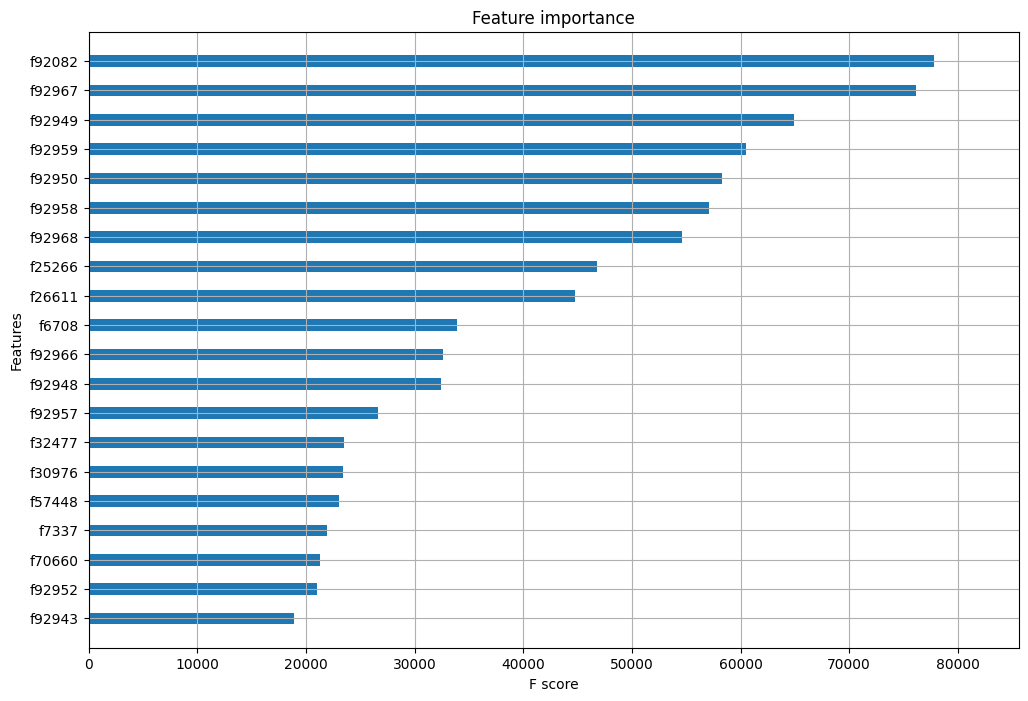

In [58]:
plot_importance(xgbreg, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)

Text(0.5, 0, 'Relative F_Score (GAIN)')

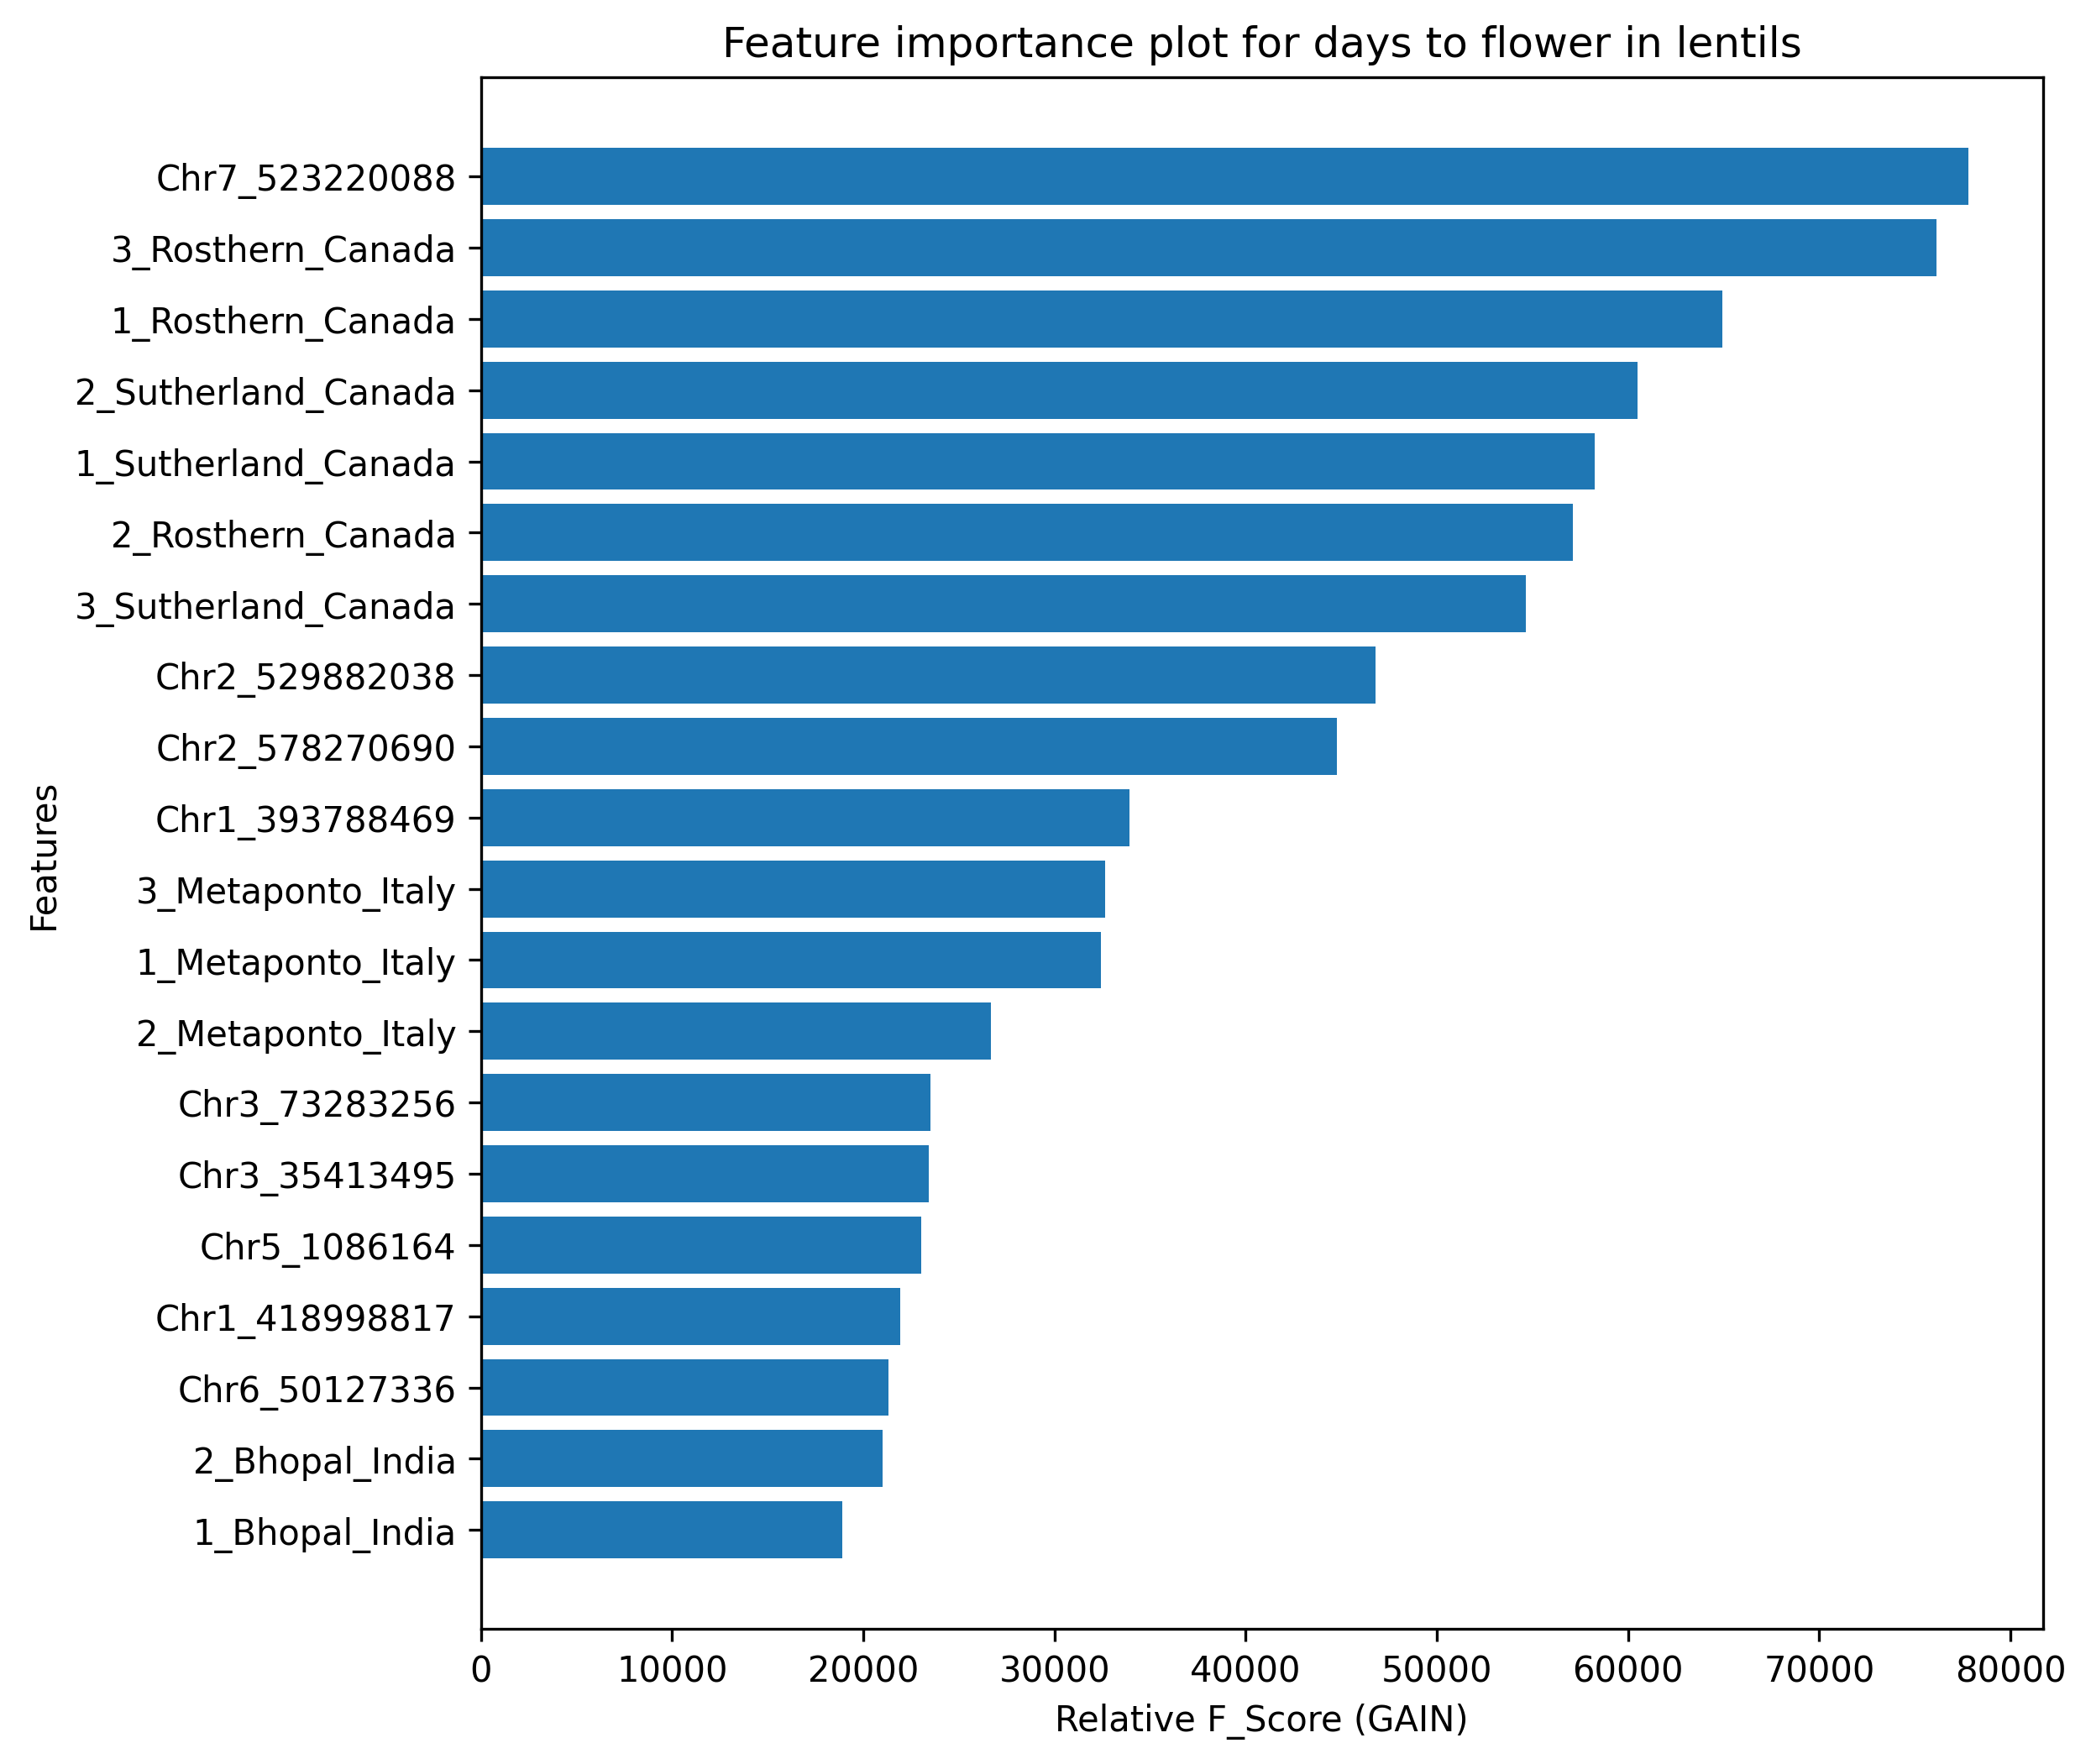

In [60]:
# The column names chnage when converted to np array so extract the names again
f_names = ['f' + str(i) for i in range(len(snps.columns))]
my_dict = xgbreg.get_booster().get_score(importance_type="gain")

new_dict = {}
for key in my_dict:
    ind = f_names.index(key)
    new_dict[snps.columns[ind]] = my_dict[key]

new_fi = pd.Series(new_dict)
df = new_fi.to_frame()
df = df.rename(columns = {0:'F_Score(GAIN)'})
#plot dataframe now with top 20 SNPS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k')
indexes = df.nlargest(20, "F_Score(GAIN)").index
values = df.nlargest(20, "F_Score(GAIN)").values.ravel()
indexes = indexes[::-1]
values = values[::-1]
plt.barh(indexes, values)
plt.title('Feature importance plot for days to flower in lentils')
plt.ylabel('Features')
plt.xlabel('Relative F_Score (GAIN)')

## Cross validation

In [23]:
def eval_k_fold(m, x, y, k):
    #model: xgboost model, should be with the best params available
    #x: input data (eg. all samples and SNPS)
    #y: labels
    #k: number of folds for cross validation
    cv = KFold(n_splits=k,shuffle=True)
  #  fig1 = plt.figure(figsize=[12,12])

   # tprs = []
   # aucs = []
    results = []
   # mean_fpr = np.linspace(0,1,100)
    low = 100
    best = m
    i = 1
    for train,test in cv.split(x,y):
        #print(y[test])
        m.fit(x[train],y[train].ravel())
        print("fitting done. Processing fold accuracy + checking best model")
        #predictions = [round(value) for value in y_pred]
        #sees how accurate the model was when testing the test set
        all_preds = [x for x in m.predict(x[test])]
        ss = sqrt(mean_squared_error(all_preds, y[test]))
        rr = r2_score(all_preds, y[test])
        mm = np.mean(y[test])
        error_mean = ((ss/mm)*100)
        print("R^2 Value is: " + str(rr))
        print("RMSE for dataset is:" +str(ss) + "& mean of this fold is " + str(mm))
        print("this is "+ str((ss/mm)*100) + "% of the mean pheno data")
        if(error_mean < low):
            low = error_mean
            best = m
        results.append(error_mean)
        i= i+1
    print("Training Testing Accuracy: %.2f%% (%.2f%%)" % (np.mean(results), np.std(results)))
    return best

In [24]:
X_full = X_full.to_numpy()
y_full = y_full.to_numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

In [25]:
best_model = eval_k_fold(xgbreg, X_full, y_full, 10)

fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9825446082157958
RMSE for dataset is:4.608506133798577& mean of this fold is 89.51282051282051
this is 5.148431372619436% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9823547330241554
RMSE for dataset is:4.590061772215305& mean of this fold is 86.81325730577335
this is 5.287282051920027% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9831503848746082
RMSE for dataset is:4.521714729543176& mean of this fold is 88.10833927298646
this is 5.131994050567141% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9845679400326538
RMSE for dataset is:4.4094323143014735& mean of this fold is 88.23806129722024
this is 4.99719990384737% of the mean pheno data
fitting done. Processing fold accuracy + checking best model
R^2 Value is: 0.9846038268641094
RMSE for dataset i

In [1]:
#pickle.dump(best_model, open("best_model_lentil_chr_50.pickle.dat", "wb"))
best_model = pickle.load(open("best_model_lentil_chr_50.pickle.dat", "rb"))

NameError: name 'pickle' is not defined

### Test model on holdout

In [9]:
X_holdout = X_holdout.to_numpy()
y_holdout = y_holdout.to_numpy()

NameError: name 'X_holdout' is not defined

In [13]:
all_preds = [x for x in best_model.predict(X_holdout)]
ss = sqrt(mean_squared_error(all_preds, y_holdout))
rr = r2_score(all_preds, y_holdout)
mm = np.mean(y_holdout)
error_mean = ((ss/mm)*100)
print("R^2 Value of Holdout: %.2f" % rr)
print("RMSE of Holdout: %.2f" % ss)
print("Mean of Holdout: %.2f" % mm)
print("this is "+ str((ss/mm)*100) + "% of the mean pheno data")

R^2 Value of Holdout: 0.98
RMSE of Holdout: 4.58
Mean of Holdout: 87.58
this is 5.227434628759109% of the mean pheno data


In [ ]:
# Checking prediction accuracy

0 85.0 82.79135
1 119.0 119.80959
2 142.0 142.69647
3 45.0 44.488987
4 49.0 51.579315
5 46.0 45.115215


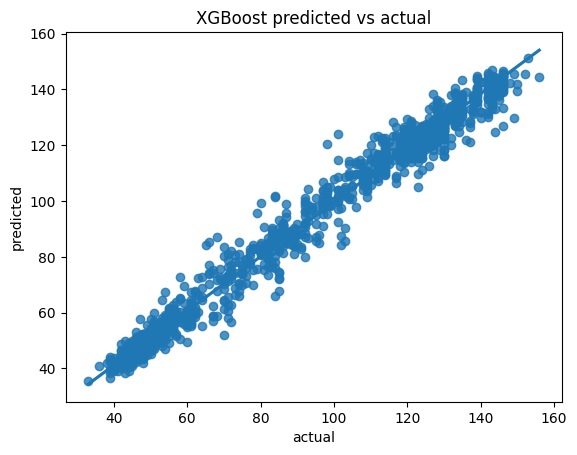

In [32]:
plot_x, plot_y = list(), list()

y_holdout = y_holdout.ravel()

for counter, i in enumerate(y_holdout):
    if counter <= 5:
        print(counter, i, all_preds[counter])
    #zoom in a bit closer
    if(all_preds[counter] > 1):
        plot_x.append(i)
        plot_y.append(all_preds[counter])
    
#plt.plot(plot_x, plot_y, '.')
thisplot = pd.DataFrame({'actual':plot_x, 'predicted':plot_y})
#sns.jointplot(x="Oil", y="preds", data=thisplot, kind='reg' , joint_kws={'scatter_kws': {'alpha': 0.2}})
figure1 = sns.regplot(x="actual", y="predicted", data=thisplot).set_title('XGBoost predicted vs actual')

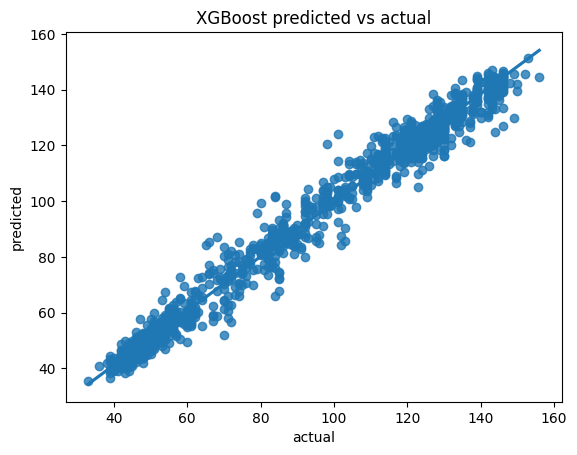

In [33]:
fig1 = sns.regplot(x="actual", y="predicted", data=thisplot).set_title('XGBoost predicted vs actual')

fig1.figure.savefig("Lentil XGBoost Regressor predicted vs actual phenotypes 29th aug 2024")

In [34]:
y_holdout = y_holdout.tolist()
out_df = pd.DataFrame(data={"y_orig": y_holdout, "y_pred": all_preds})
out_df.to_csv("y_orig_vs_y_pred_dtf.csv", sep=',',index=False)

## XAI

### XGBoost feature importance

<Figure size 2000x2000 with 0 Axes>

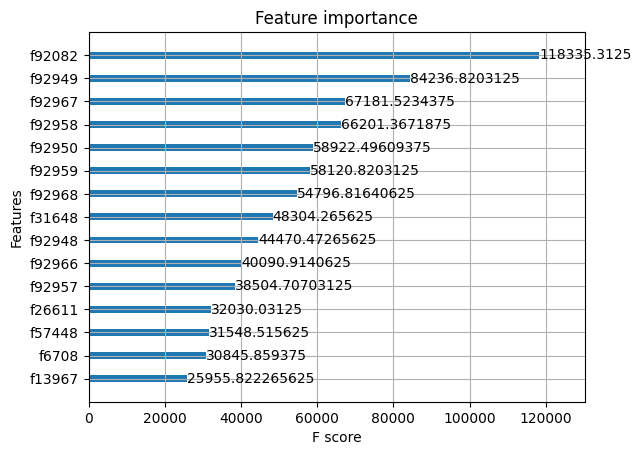

In [10]:
from xgboost import plot_importance
from matplotlib import pyplot
#best_model = pickle.load(open("best_model_lentil_chr_50.pickle.dat", "rb"))
plt.figure(figsize = (20, 20))
plot_importance(best_model, max_num_features=15, importance_type='gain', height=0.3)
pyplot.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

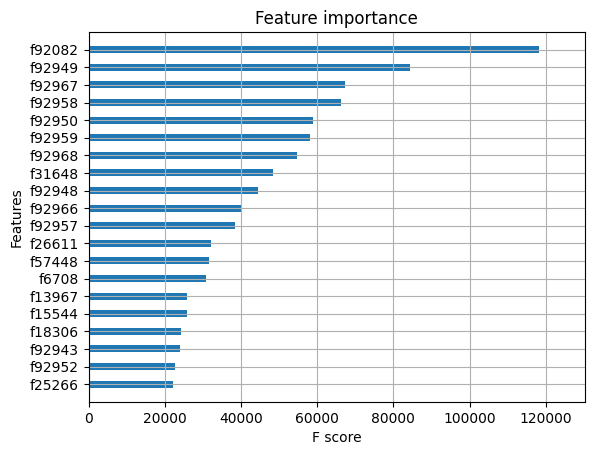

In [36]:
plot_importance(best_model, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)

In [13]:
f_names = ['f' + str(i) for i in range(len(ohe_data.columns))]
my_dict = best_model.get_booster().get_score(importance_type="gain")

new_dict = {}
for key in my_dict:
    ind = f_names.index(key)
    new_dict[ohe_data.columns[ind]] = my_dict[key]

new_fi = pd.Series(new_dict)
df = new_fi.to_frame()
df = df.rename(columns = {0:'F_Score(GAIN)'})

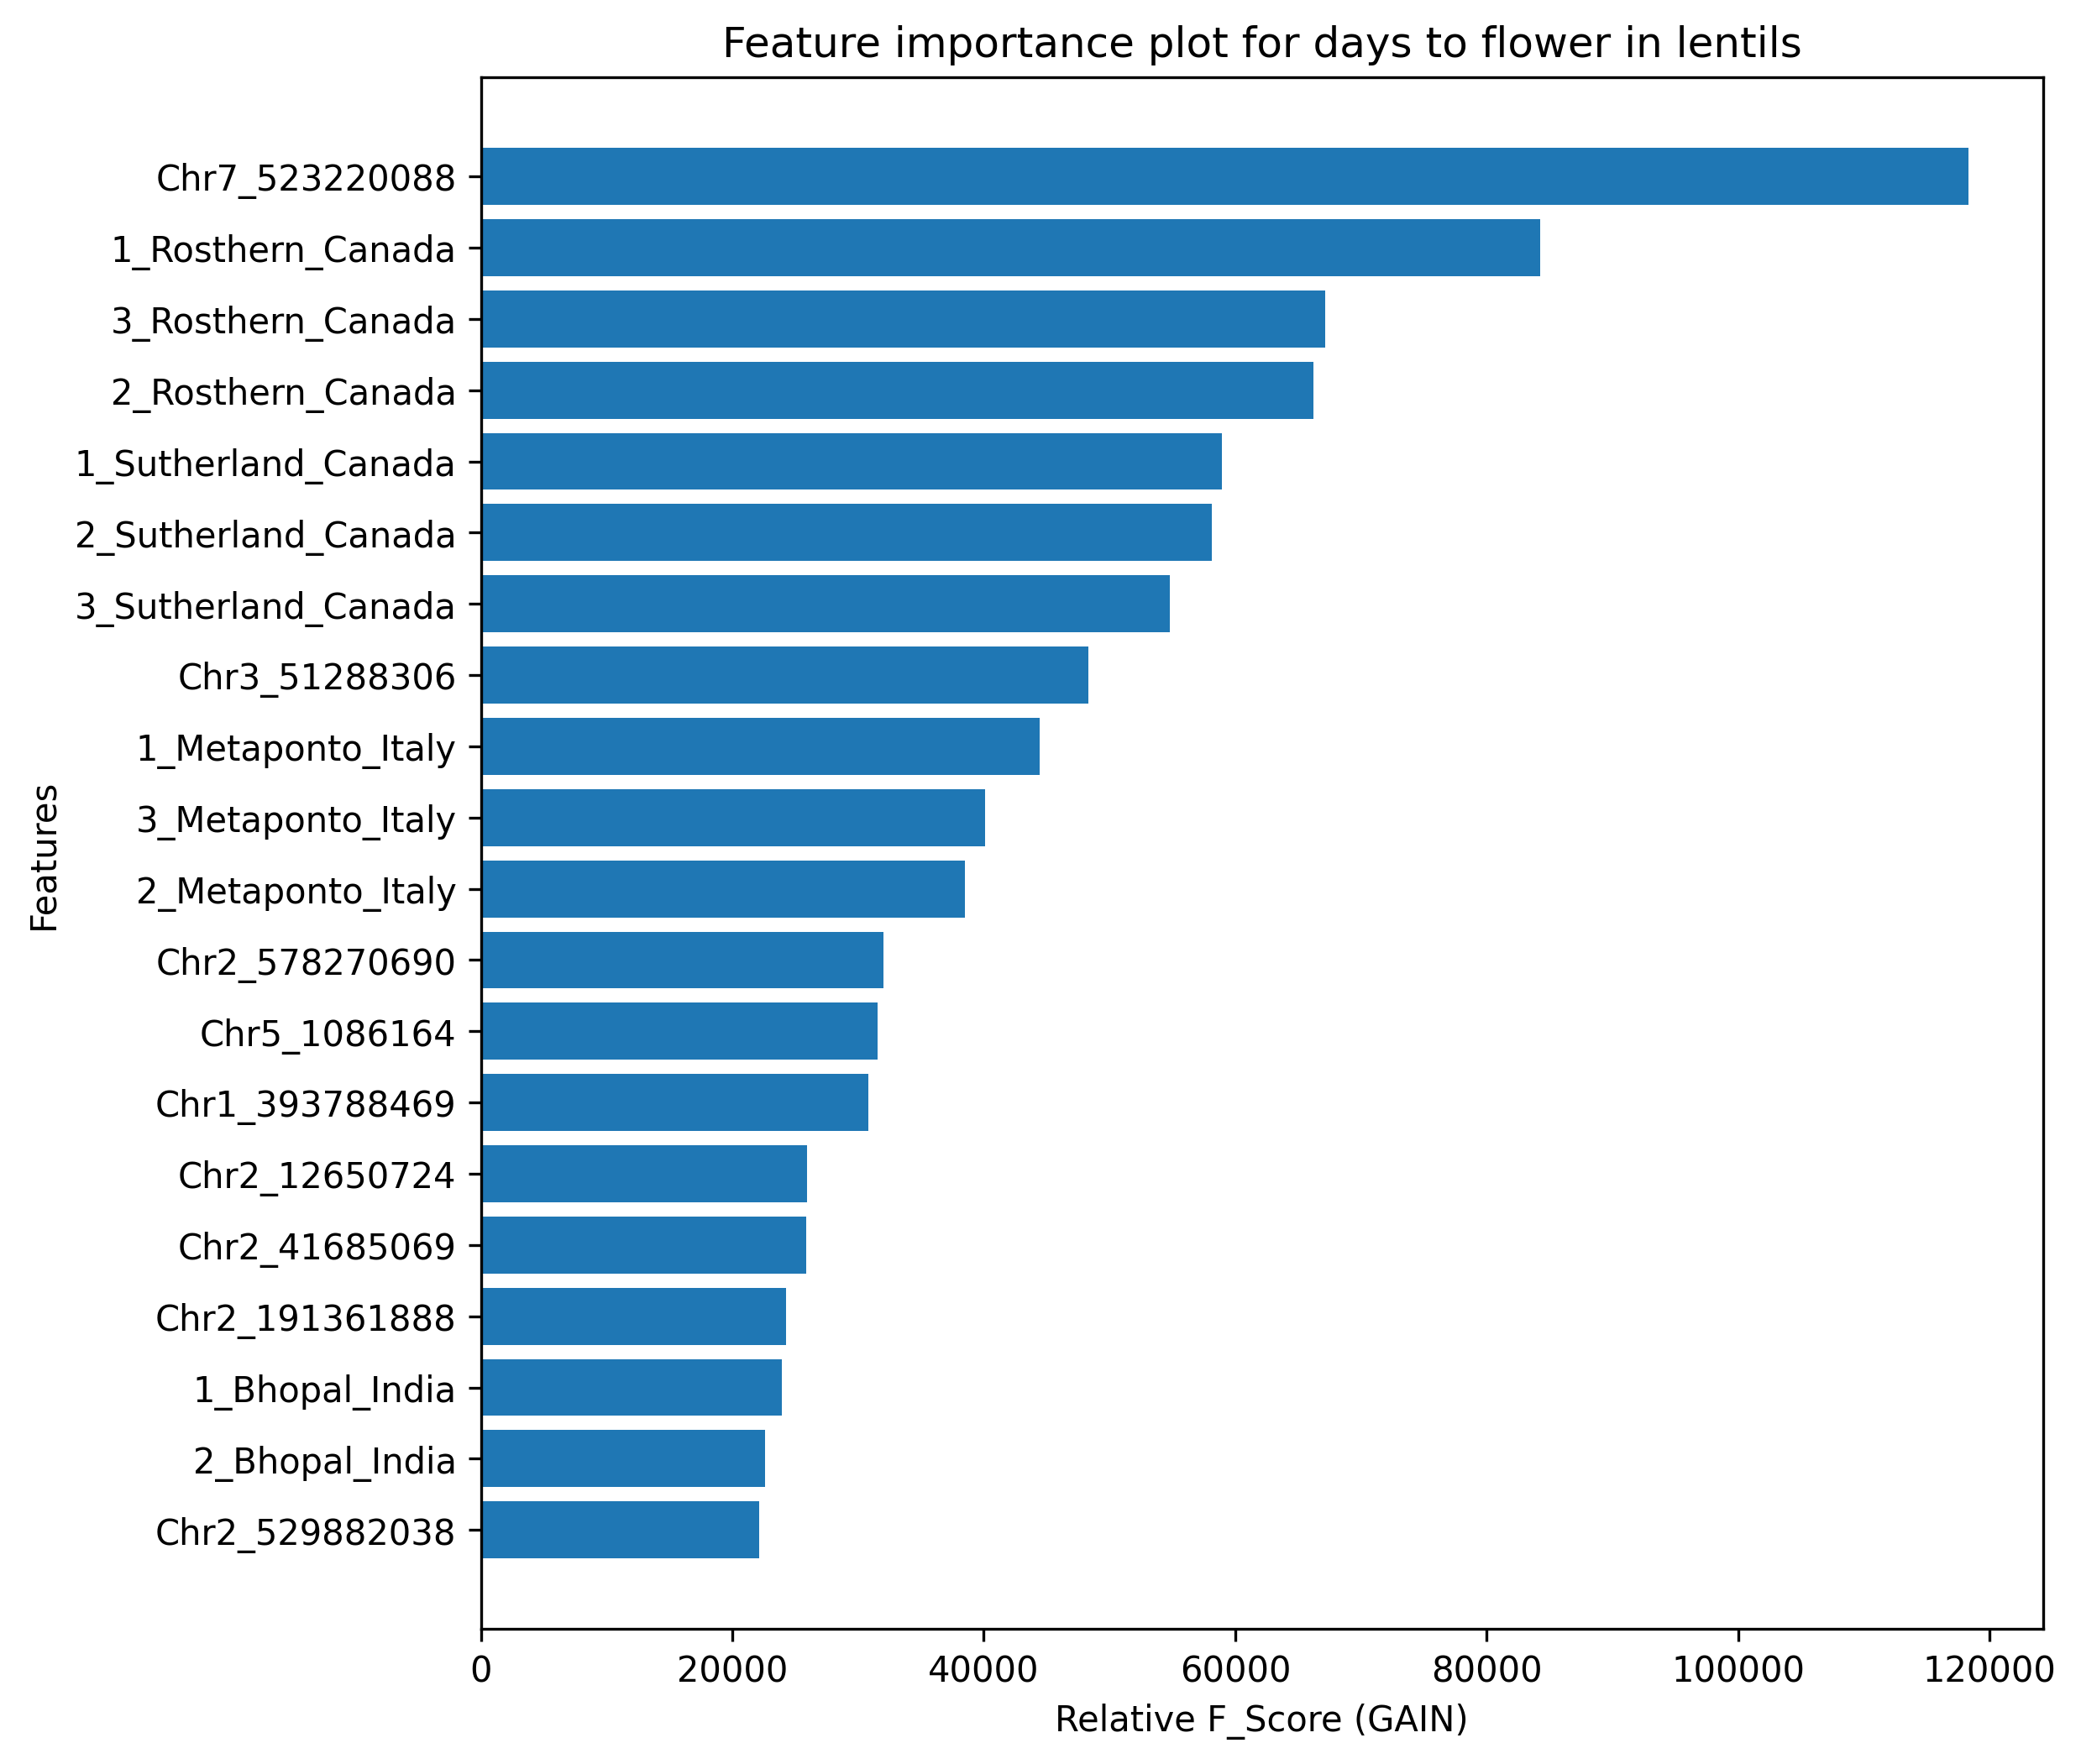

In [14]:
#plot dataframe now with top 20 SNPS
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 8), dpi=300, facecolor='w', edgecolor='k')
indexes = df.nlargest(20, "F_Score(GAIN)").index
values = df.nlargest(20, "F_Score(GAIN)").values.ravel()
indexes = indexes[::-1]
values = values[::-1]
plt.barh(indexes, values)
plt.title('Feature importance plot for days to flower in lentils')
plt.ylabel('Features')
plt.xlabel('Relative F_Score (GAIN)')
plt.savefig('XGBoost Feature importance plot for days to flower in lentils.png')

### SHAP

In [4]:
explainer = shap.Explainer(best_model)

In [5]:
shap_values = explainer(X_train)
#shap_values =explainer(X_test) # since the aim is to see how the model learns we are checking explanation fo training set

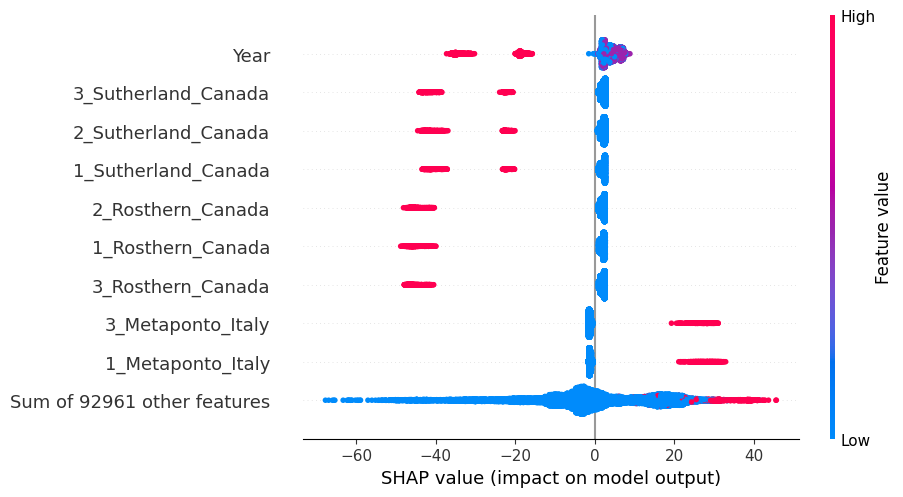

In [26]:
shap.plots.beeswarm(shap_values, show=False)

In [27]:
plt.savefig('SHAP_summary.png')

<Figure size 640x480 with 0 Axes>

In [ ]:
shap.plots.scatter(shap_values)

In [11]:
feature_index = X_train.columns.get_loc("Chr7_523220088")
shap_feature_values = shap_values[:, feature_index]

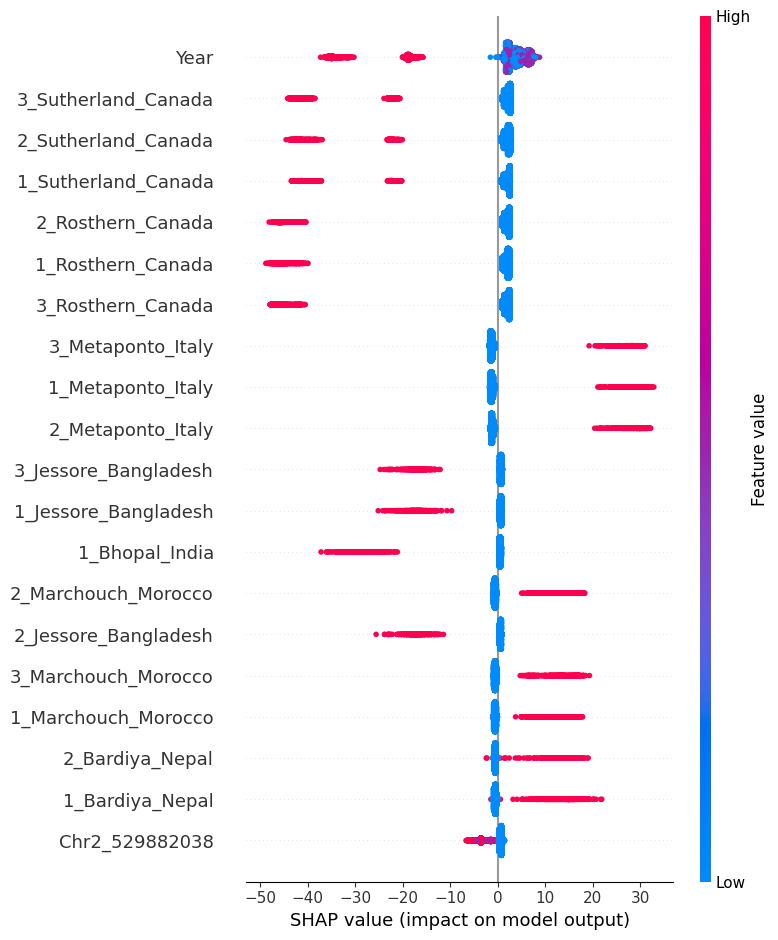

In [14]:
shap.summary_plot(shap_values, X_train, plot_type="dot", feature_names=X_train.columns)

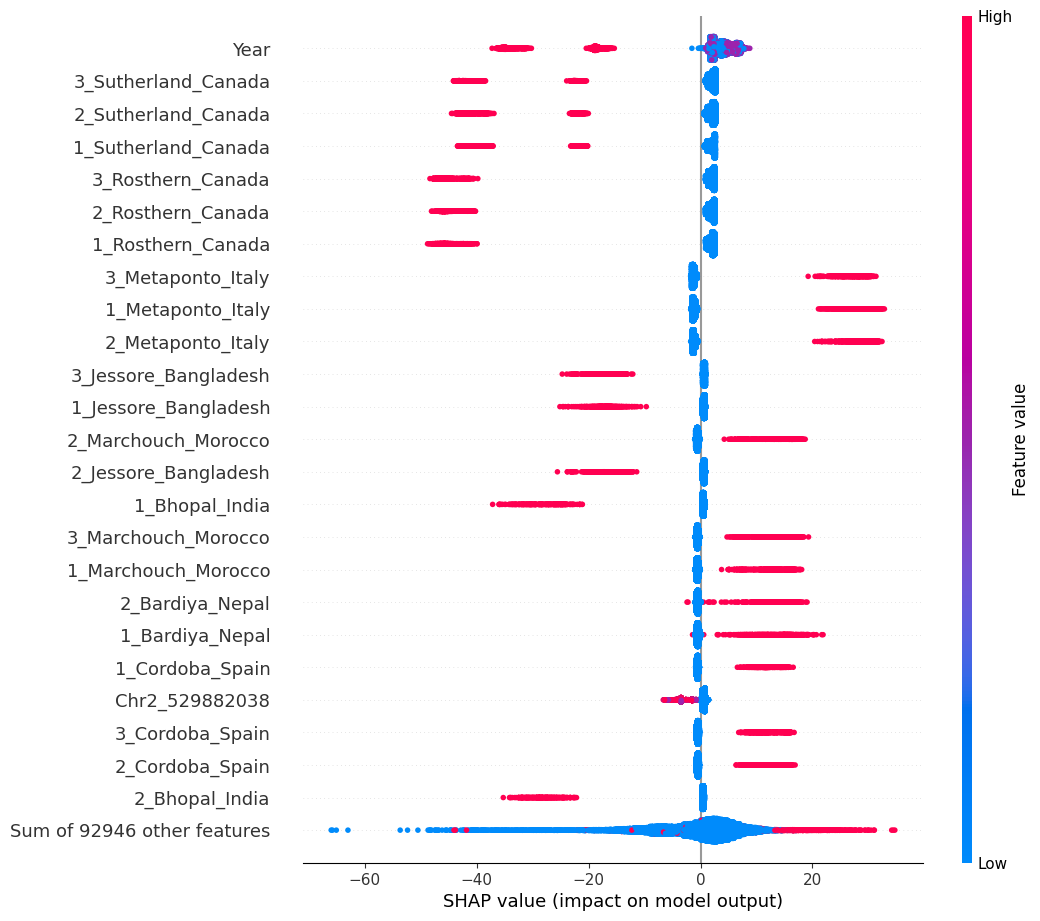

In [31]:
shap.plots.beeswarm(shap_values,25, plot_size=[10,11])

In [15]:
print(f'Size: {plt.gcf().get_size_inches()}')

Size: [6.4 4.8]


<Figure size 640x480 with 0 Axes>

In [18]:
# Add this code
print(f'Original size: {plt.gcf().get_size_inches()}')
w, _ = plt.gcf().get_size_inches()
plt.gcf().set_size_inches(w, w*3/4)
plt.tight_layout()
print(f'New size: {plt.gcf().get_size_inches()}')

plt.savefig('fig_tes2.png', bbox_inches='tight',dpi=100)

Original size: [6.4 4.8]
New size: [6.4 4.8]


<Figure size 640x480 with 0 Axes>

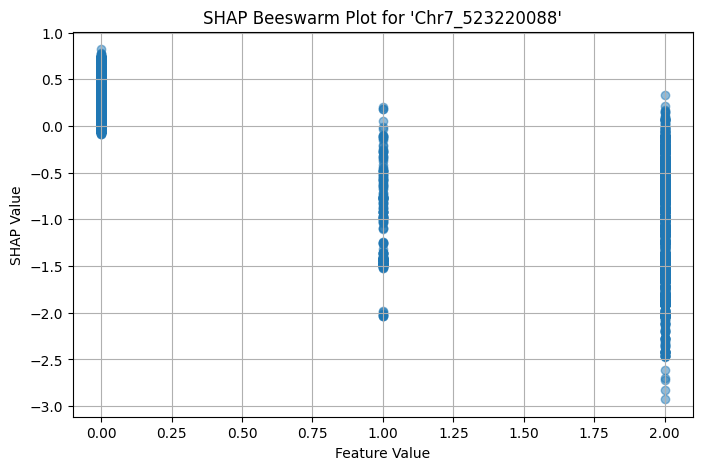

In [18]:
feature_index = X_train.columns.get_loc("Chr7_523220088")
feature_shap_values = shap_values.values[:, feature_index]
feature_values = X_train.iloc[:, feature_index]

# Create a beeswarm-like plot for the specific feature
plt.figure(figsize=(8, 5))
plt.scatter(feature_values, feature_shap_values, alpha=0.5)
plt.xlabel("Feature Value")
plt.ylabel("SHAP Value")
plt.title(f"SHAP Beeswarm Plot for '{X_train.columns[feature_index]}'")
plt.grid(True)
plt.show()

In [20]:
# Because SHAP takes a lot of memory for quick analysis I am subsetting
explanation = explainer(X_train[:1000])

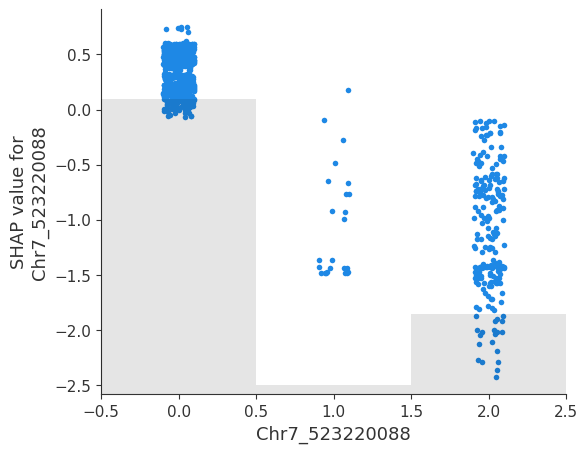

In [9]:
shap.plots.scatter(explanation[:, "Chr7_523220088"])

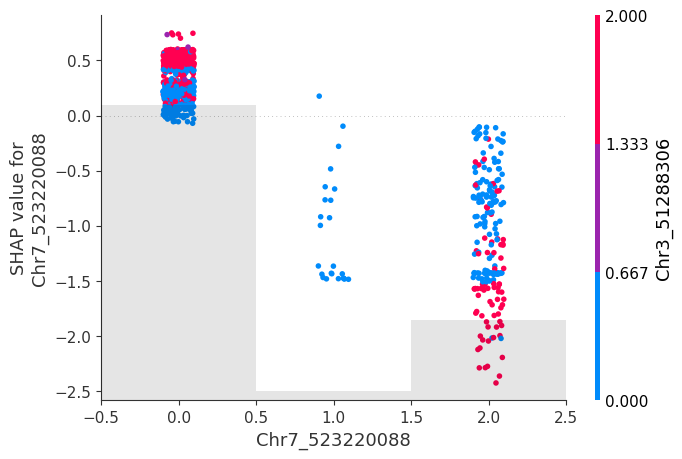

In [10]:
shap.plots.scatter(explanation[:, "Chr7_523220088"], color=explanation)

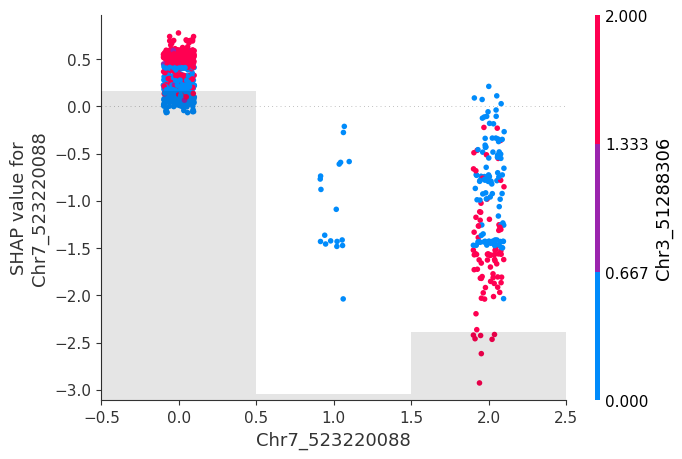

In [23]:
shap.plots.scatter(explanation[:, "Chr7_523220088"], color=explanation)

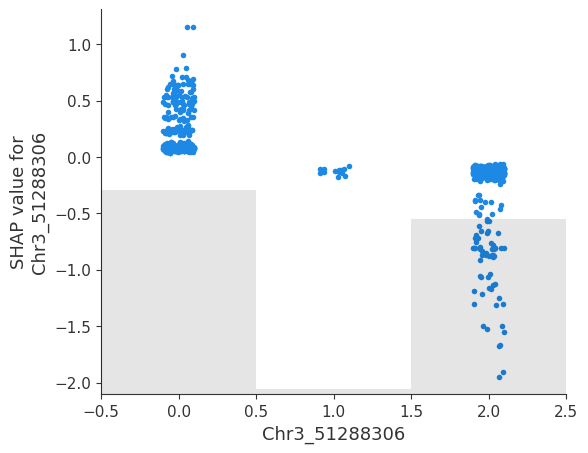

In [12]:
shap.plots.scatter(explanation[:, "Chr3_51288306"])

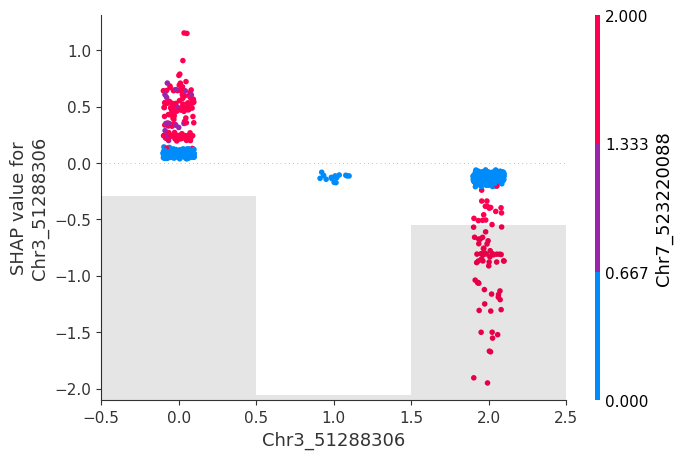

In [13]:
shap.plots.scatter(explanation[:, "Chr3_51288306"], color=explanation)

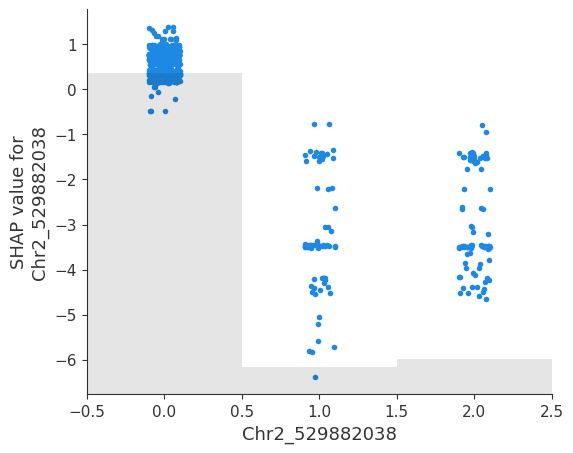

In [14]:
shap.plots.scatter(explanation[:, "Chr2_529882038"])

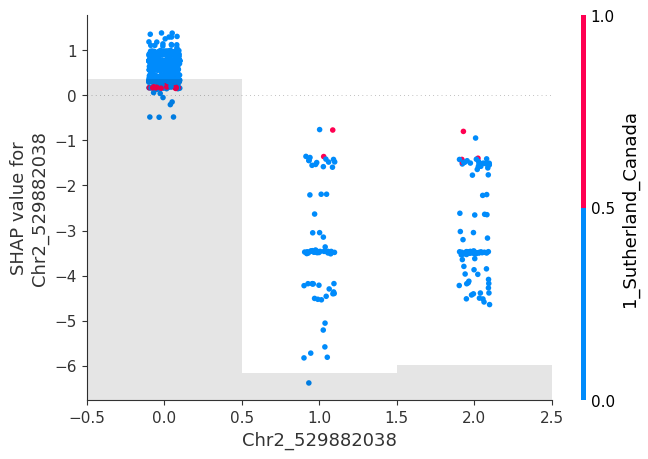

In [15]:
shap.plots.scatter(explanation[:, "Chr2_529882038"], color=explanation)

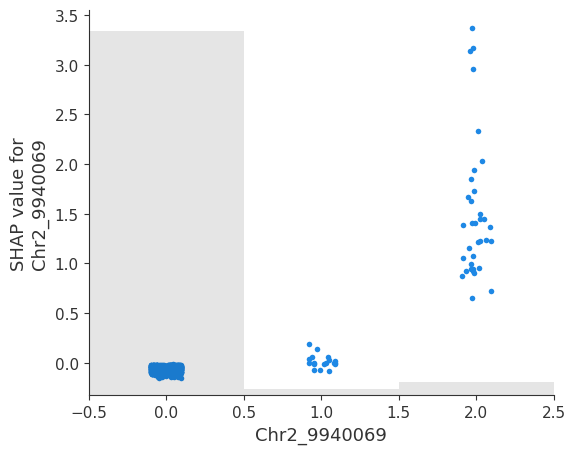

In [16]:
shap.plots.scatter(explanation[:, "Chr2_9940069"])

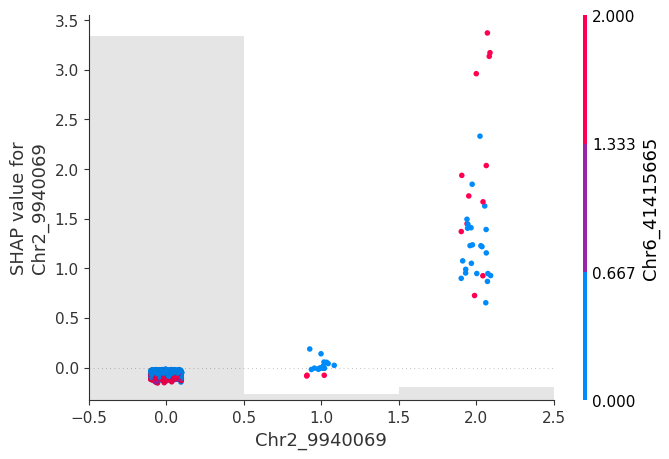

In [17]:
shap.plots.scatter(explanation[:, "Chr2_9940069"], color=explanation)

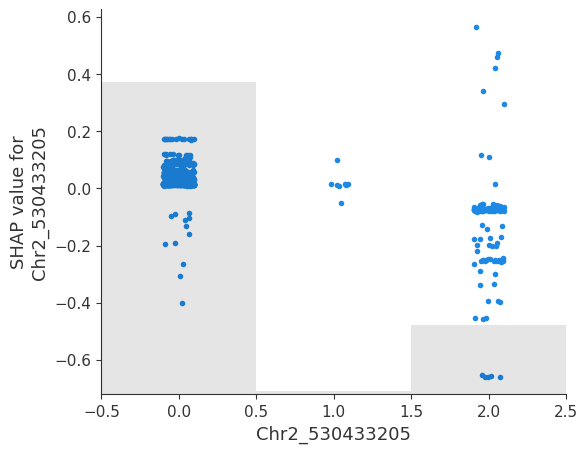

In [18]:
shap.plots.scatter(explanation[:, "Chr2_530433205"])

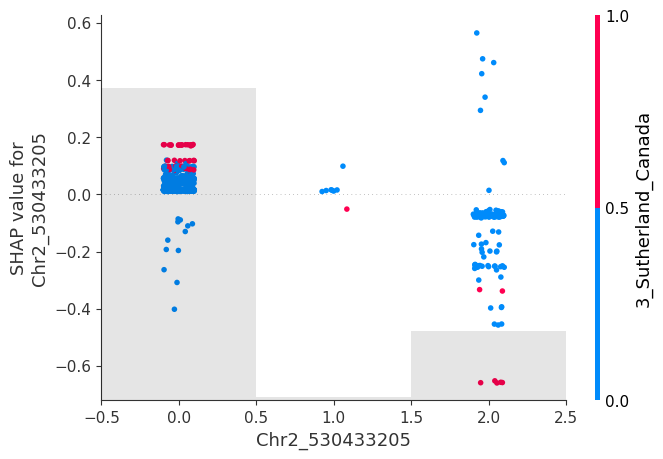

In [19]:
shap.plots.scatter(explanation[:, "Chr2_530433205"], color=explanation)

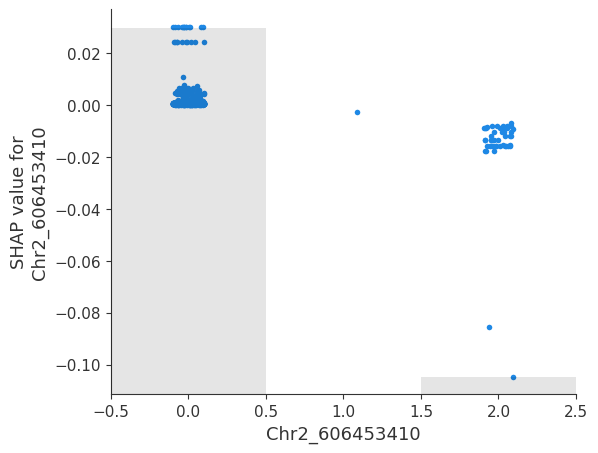

In [20]:
shap.plots.scatter(explanation[:, "Chr2_606453410"])

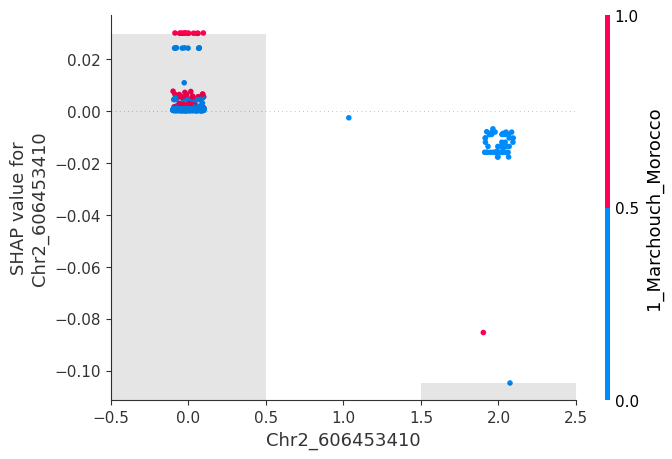

In [22]:
shap.plots.scatter(explanation[:, "Chr2_606453410"], color=explanation)

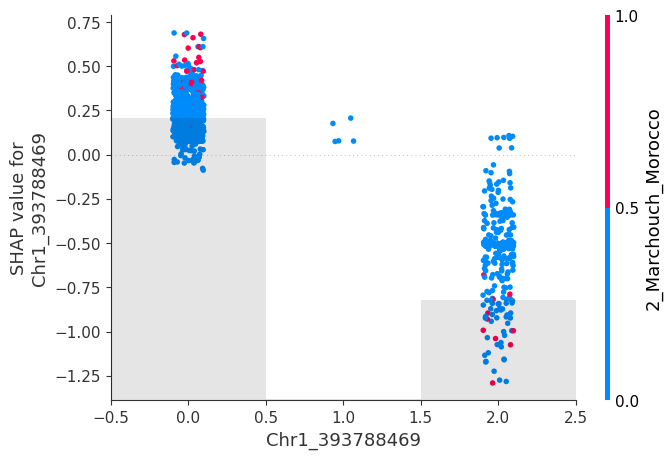

In [21]:
shap.plots.scatter(explanation[:, "Chr1_393788469"], color=explanation)

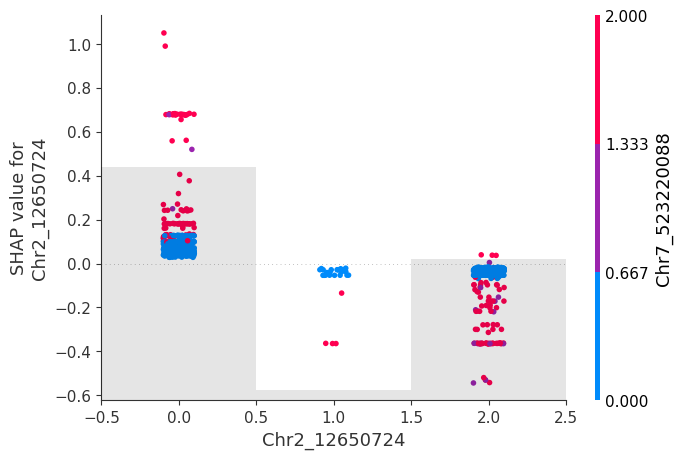

In [22]:
shap.plots.scatter(explanation[:, "Chr2_12650724"], color=explanation)

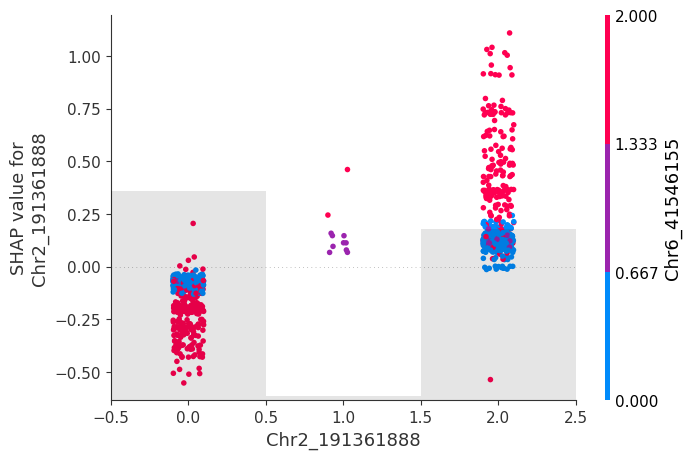

In [32]:
shap.plots.scatter(explanation[:, "Chr2_191361888"], color=explanation)

In [ ]:
shap.plots.scatter(explanation[:, "Chr2_41685069"], color=explanation)

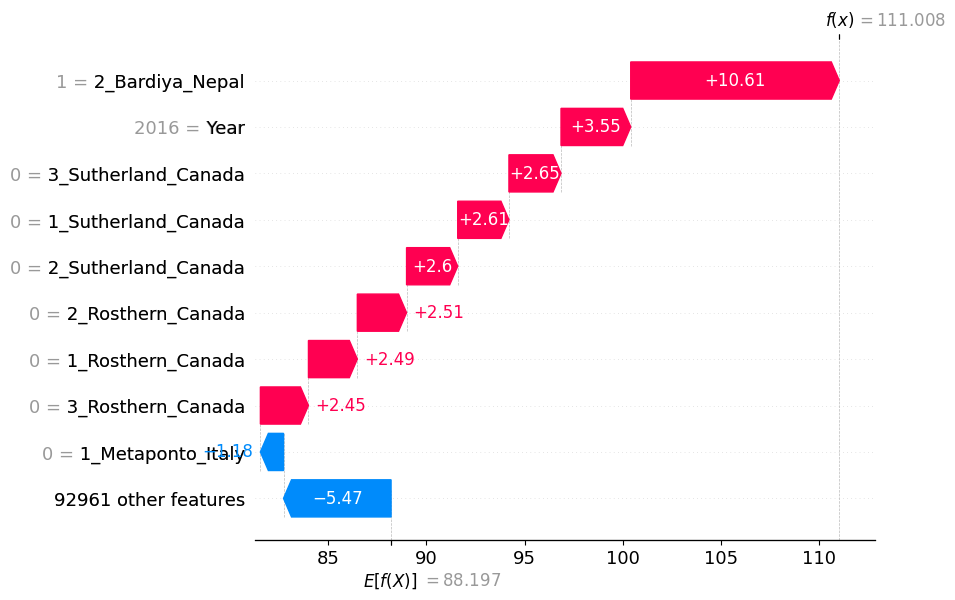

In [28]:
shap.plots.waterfall(shap_values[0], show=True)

## Random forest model

# 

In [23]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
model_to_set = RandomForestRegressor(n_jobs=-1 )

In [25]:
rfr = RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [ ]:
y_pred_rfr = rfr.predict(labels=sl)

In [39]:
r2_score(y_test, y_pred_rfr)

0.977932648351425

In [40]:
mse = mean_squared_error(y_test, y_pred_rfr)

In [41]:
rmse = np.sqrt(mse)

In [42]:
print(rmse)

5.251025312538276
